In [2]:

import numpy as np
import pandas as pd
import pickle
import matplotlib.pyplot as plt
from matplotlib.collections import LineCollection
from matplotlib.colors import ListedColormap, BoundaryNorm
import seaborn as sns
from hmmlearn import hmm


import sys
sys.path.insert(1, r'C:\dlc_projects\Analysis\git_repo\util')

import HMM_decoding as decoding
import single_ts as ts
from iteration import dlc_iter
from kinematics import dlc_kinematics
from visualization_config import visual_config


#initiate functions 
fetch=ts.dlc_ts()
kin=dlc_kinematics()
iter=dlc_iter()
visual_config=visual_config()

hmm_machine=r'C:\dlc_projects\Analysis\git_repo\data\3DHMM.pkl'
with open(hmm_machine, "rb") as file: model=pickle.load(file)

In [3]:
evaluate=[ 'LID', 'SUM', 'SKF', 'D1A', 'D2A' ]
file='C:\dlc_projects\Analysis\git_repo\data\d_base.npy'
iter.treatments=evaluate

dct=iter.get_treatments(file)



In [3]:

characters=decoding.time_spent(dct, model, kin)
time_spent=pd.DataFrame(characters, columns=['time_in', 'time', 'treatment', 'animal'])

                                                    '''The plots'''

In [5]:
dataframe=time_spent.loc[time_spent['treatment'].isin(['LID','SUM', 'SKF'])]

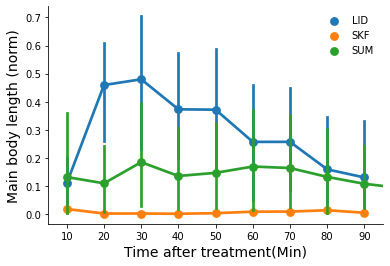

In [6]:
ax=sns.pointplot(x='time', y='time_in', hue='treatment',  data=dataframe, ci=95 )


xlabel='Time after treatment(Min)'
ylabel='Main body length (norm)'
 

ax=visual_config.kinematic_box(ax, xlabel, ylabel, legend=visual_config.legend)
plt.draw()

In [6]:

t_points=30

in_out=decoding.inside_out(dct, model, kin, t_points)

inout_df=pd.DataFrame(in_out, columns=['ar', 'head_ang', 'abs_speed','key', 'treatment', 'inside'])
inout_df.head()

In [8]:
axes=plt.subplots(1,4)


sns.barplot(
    data=df, x="body_mass_g", y="island",
    errorbar=("pi", 50), capsize=.4, errcolor=".5",
    linewidth=3, edgecolor=".5", facecolor=(0, 0, 0, 0),
)
for ax in axes:
    

,inside_ar,inside_head_ang,inside_absrot_speed,outside_ar,outside_head_ang,outside_absrot_speed,ky,treatment
0,0.540235,0.074785,21.553182,0.560867,-0.00655,22.279364,26_D1A,D1A
